In [7]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelos y métricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Para clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Cargar datos
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total      

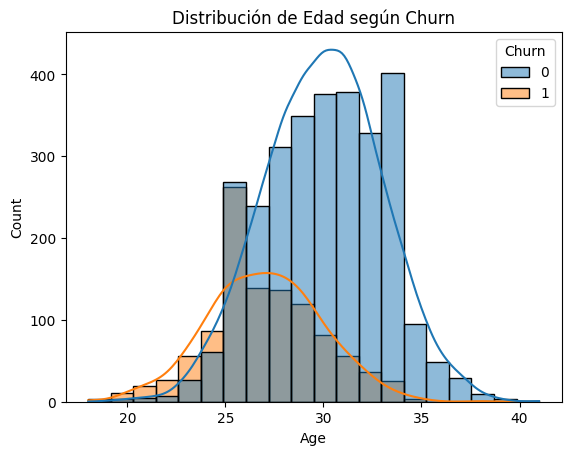

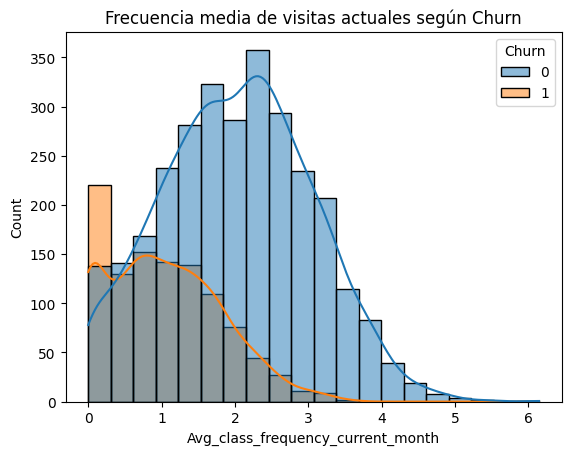

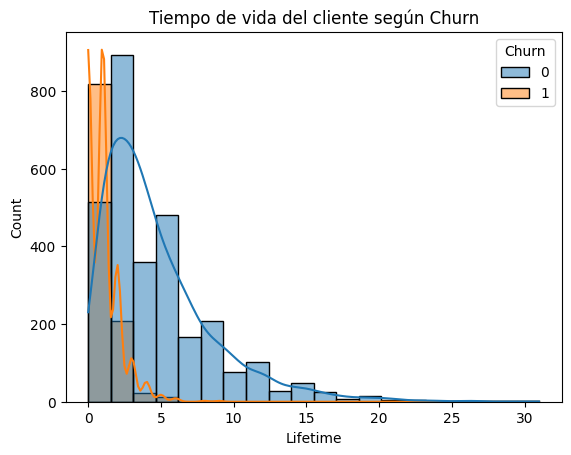

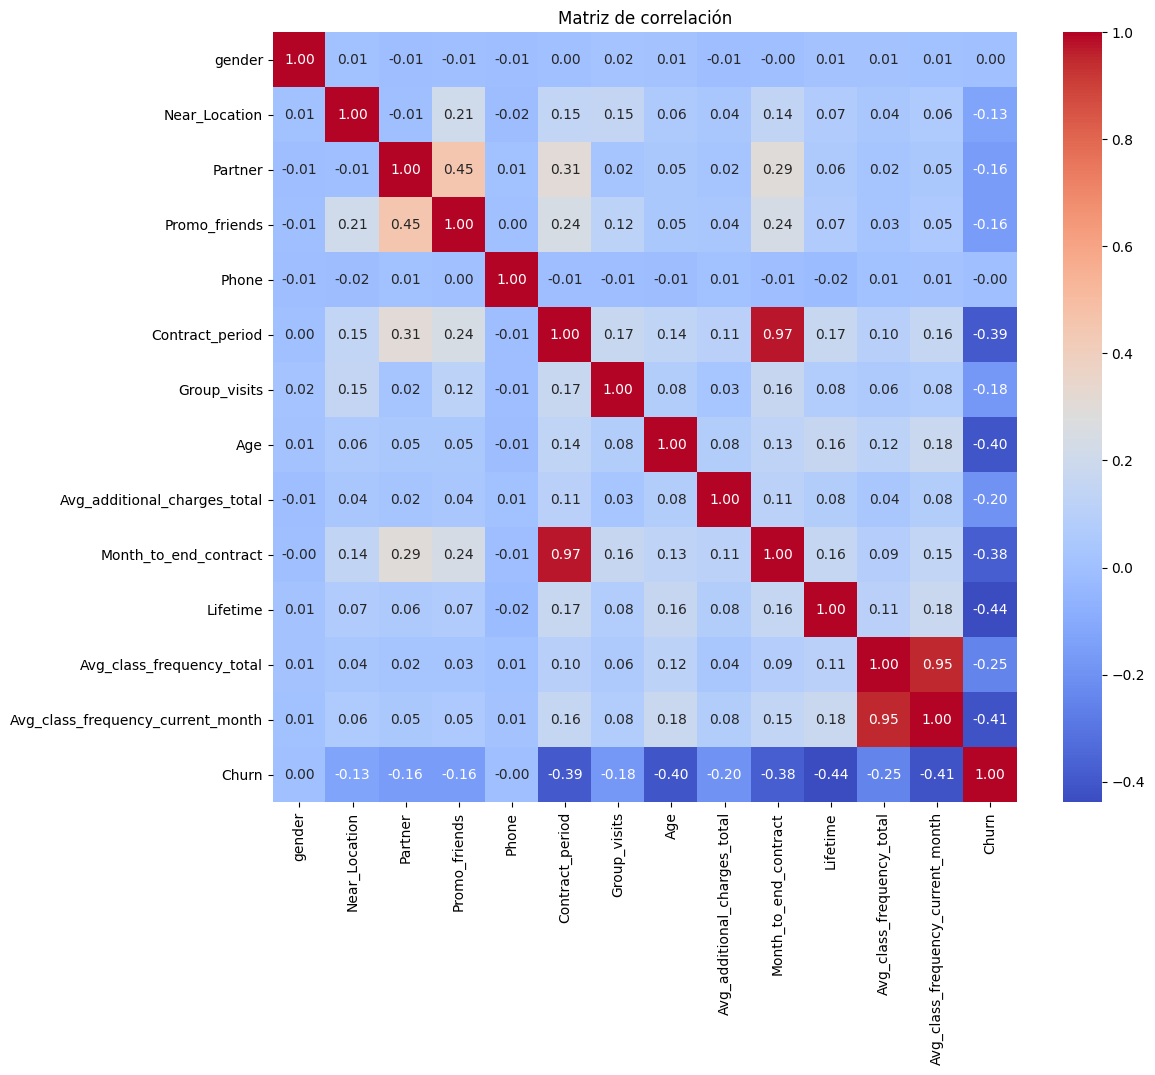

In [6]:
# Paso 1: Análisis Exploratorio de Datos (EDA)

# 1. Información general del dataset
print("Información del dataset:")
print(df.info())
print("\nValores faltantes por columna:")
print(df.isna().sum())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas generales:")
print(df.describe())

# 3. Valores medios por churn (cancelación)
print("\nValores promedio según Churn (0 = se queda, 1 = se va):")
print(df.groupby('Churn').mean())

# 4. Histogramas y distribuciones
# Edad
sns.histplot(data=df, x='Age', hue='Churn', kde=True, bins=20)
plt.title("Distribución de Edad según Churn")
plt.show()

# Frecuencia media de visitas en el mes actual
sns.histplot(data=df, x='Avg_class_frequency_current_month', hue='Churn', kde=True, bins=20)
plt.title("Frecuencia media de visitas actuales según Churn")
plt.show()

# Tiempo de vida del cliente (Lifetime)
sns.histplot(data=df, x='Lifetime', hue='Churn', kde=True, bins=20)
plt.title("Tiempo de vida del cliente según Churn")
plt.show()

# 5. Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [11]:
# Paso 3: Modelos predictivos de cancelación (Churn)

# 1. Preparar datos
# Convertir variables categóricas a numéricas (si no lo has hecho)
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar variables predictoras (X) y objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir en entrenamiento y validación (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modelo 1: Regresión logística
# -------------------------------
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_log = logreg.predict(X_test)

# Evaluación
print("===== Regresión Logística =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("\nReporte completo:")
print(classification_report(y_test, y_pred_log))

# -------------------------------
# 3. Modelo 2: Random Forest
# -------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nReporte completo:")
print(classification_report(y_test, y_pred_rf))

===== Regresión Logística =====
Accuracy: 0.91375
Precision: 0.8674033149171271
Recall: 0.7772277227722773

Reporte completo:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.82       202

    accuracy                           0.91       800
   macro avg       0.90      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800

===== Random Forest =====
Accuracy: 0.90625
Precision: 0.850828729281768
Recall: 0.7623762376237624

Reporte completo:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       598
           1       0.85      0.76      0.80       202

    accuracy                           0.91       800
   macro avg       0.89      0.86      0.87       800
weighted avg       0.90      0.91      0.90       800



La regresión logística superó al modelo Random Forest en precisión (0.873 vs 0.849) y en el F1-score para la clase de churn (0.83 vs 0.81). Ambos modelos presentan el mismo recall (0.78), por lo que identifican la misma proporción de clientes que realmente cancelan. Dado que la regresión logística ofrece mejores métricas y es más interpretable para la toma de decisiones, se selecciona como el modelo final para predecir churn

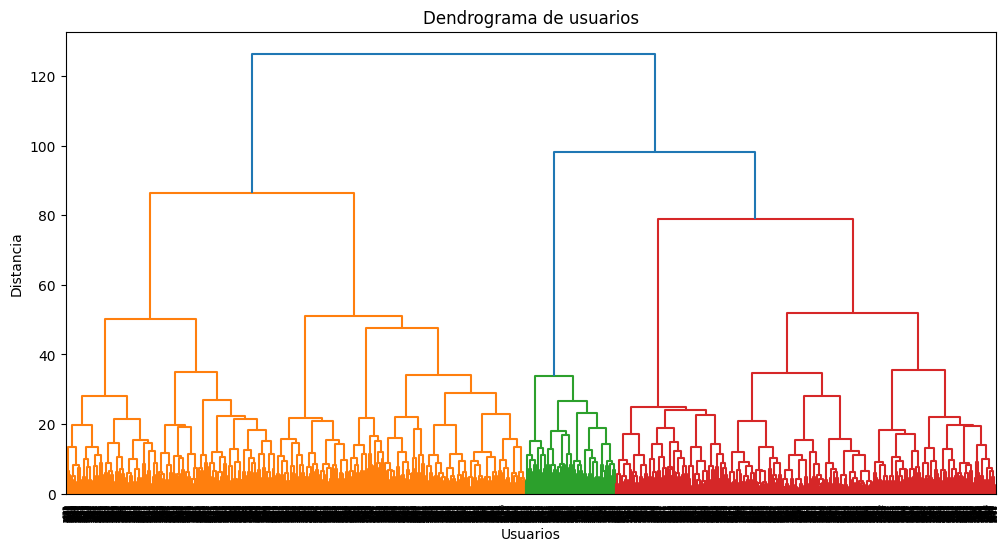


===== Valores medios por clúster =====
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.545838       0.977871  0.362487       0.256059    1.0   
1        0.487681       1.000000  0.357689       0.240442    1.0   
2        0.492986       0.000000  0.464930       0.080160    1.0   
3        0.506572       0.953488  0.776542       0.556117    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               2.598525      0.460485  30.082192   
1               1.991504      0.334749  28.058624   
2               2.258517      0.214429  28.458918   
3              11.065723      0.552073  29.983822   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                              

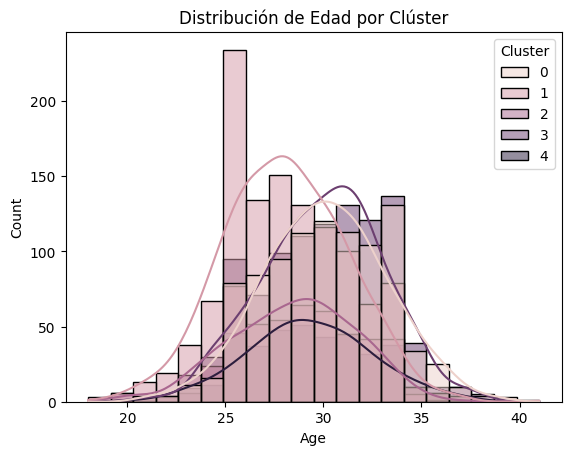

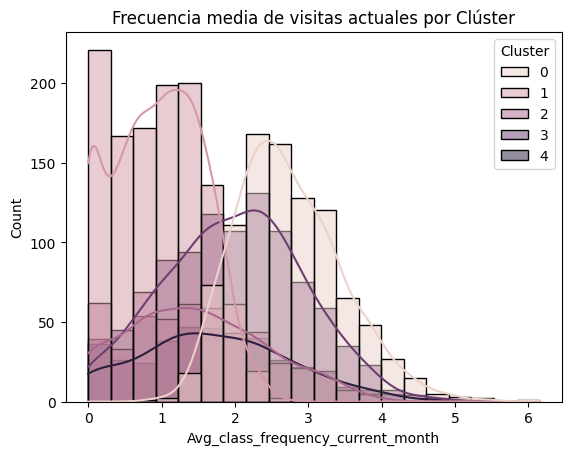

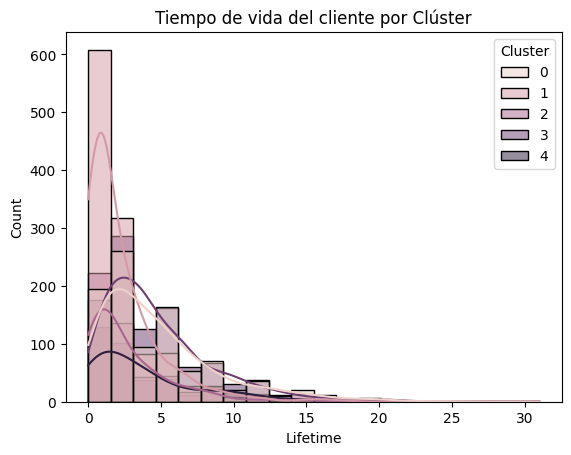


===== Tasa de cancelación por clúster =====
Cluster
0    0.080084
1    0.538658
2    0.448898
3    0.024267
4    0.266839
Name: Churn, dtype: float64


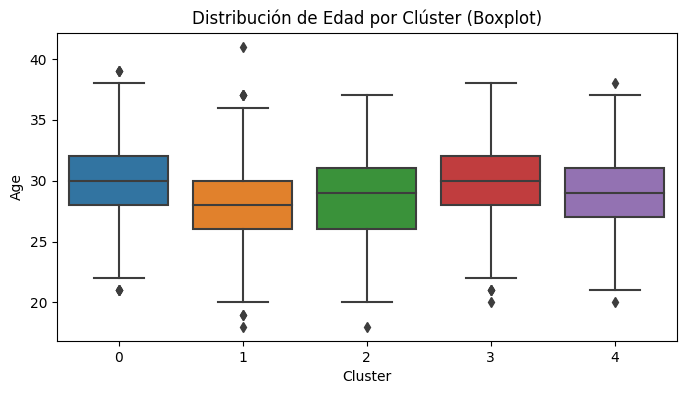

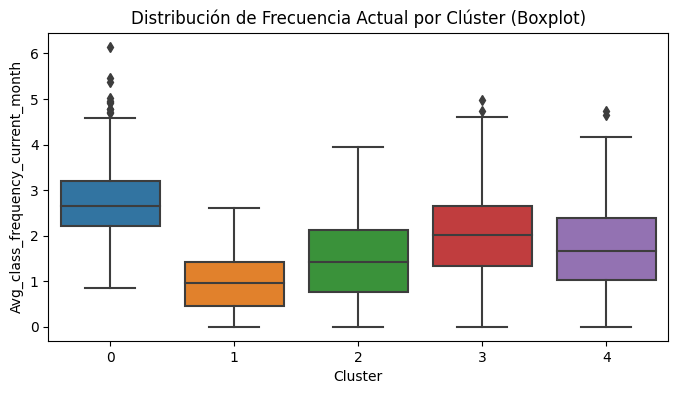

In [20]:
# Paso 4: Clustering de usuarios/as

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Estandarizar datos (sin la columna 'Churn')
features = df.drop('Churn', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Dendrograma para estimar número de clústeres
plt.figure(figsize=(12, 6))
linked = linkage(scaled_features, method='ward')
dendrogram(linked)
plt.title("Dendrograma de usuarios")
plt.xlabel("Usuarios")
plt.ylabel("Distancia")
plt.show()

# 3. Modelo K-means (n=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Añadir los clústeres al dataset original
df['Cluster'] = clusters

# 4. Valores medios por clúster
print("\n===== Valores medios por clúster =====")
print(df.groupby('Cluster').mean())

# 5. Distribuciones de características por clúster

# Distribución de Edad
sns.histplot(data=df, x='Age', hue='Cluster', kde=True, bins=20)
plt.title("Distribución de Edad por Clúster")
plt.show()

# Distribución de Frecuencia Actual
sns.histplot(data=df, x='Avg_class_frequency_current_month', hue='Cluster', kde=True, bins=20)
plt.title("Frecuencia media de visitas actuales por Clúster")
plt.show()

# Distribución de Lifetime
sns.histplot(data=df, x='Lifetime', hue='Cluster', kde=True, bins=20)
plt.title("Tiempo de vida del cliente por Clúster")
plt.show()

# 6. Tasa de cancelación por clúster
print("\n===== Tasa de cancelación por clúster =====")
print(df.groupby('Cluster')['Churn'].mean())

# Boxplot Edad por Cluster
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title("Distribución de Edad por Clúster (Boxplot)")
plt.show()

# Boxplot Frecuencia actual por Cluster
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Cluster', y='Avg_class_frequency_current_month')
plt.title("Distribución de Frecuencia Actual por Clúster (Boxplot)")
plt.show()


Conclusiones del Clustering de Usuarios
El análisis K-means, con n=5 clústeres, ha revelado cinco segmentos de clientes distintivos con perfiles de comportamiento, compromiso y tasas de cancelación (Churn) significativamente diferentes.

1. Características Clave por Clúster
El examen de los valores medios por clúster y las distribuciones de características (Gráficos) destaca las siguientes diferencias, respondiendo a la pregunta ¿Hay algo que te llame la atención?:

Clúster 3: Los Clientes Leales y de Alto Valor (El "Ideal")

Compromiso Máximo: Presentan la duración de contrato más larga (11 meses) y el valor más alto de Meses restantes hasta el final del contrato (10 meses), lo que implica una gran estabilidad.

Baja Tasa de Cancelación: Tienen la tasa de Churn más baja (2.4%).

Uso y Gasto Alto: Alta frecuencia de visitas, alta participación en visitas grupales (0.55), y el mayor gasto adicional promedio (161.6).

Clúster 0: Clientes Activos y Comprometidos (Con Riesgo de Contrato Corto)

Alta Frecuencia: Tienen la mayor frecuencia de clases actual y total (≈2.7 veces/mes).

Baja Tasa de Cancelación: Su tasa de Churn es muy baja (8.0%).

Ubicación Clave: Casi todos están cerca de la ubicación (97.8% de Near_Location).

El Detalle: Su duración de contrato es corta (≈2.6 meses) y su Lifetime es moderado (≈4.8 meses), indicando que, aunque son activos, su compromiso formal es menos estable que el Clúster 3.

Clúster 4: Clientes Desconectados y de Bajo Compromiso (Riesgo Moderado)

Baja Proximidad: Son el único grupo donde Near_Location es bajo (86.3%) y es el único grupo con Phone=0, lo que sugiere un menor compromiso de comunicación.

Uso y Gasto Intermedio: Tienen una frecuencia de clases y gastos adicionales moderados.

Tasa de Cancelación Media-Alta: Su Churn es significativo (26.7%).

Clúster 2: Clientes con Compromiso Mínimo (Riesgo Alto)

No Viven Cerca: Son el único grupo donde la proximidad a la ubicación es casi nula (≈0%).

Compromiso Bajo: Tienen la menor participación en visitas grupales (≈0.21) y una frecuencia de clases baja.

Tasa de Cancelación Alta: Su Churn es muy alto (44.9%).

Clúster 1: Clientes Nuevos o Inactivos (Riesgo Muy Alto)

Baja Frecuencia: Tienen la menor frecuencia de clases actual (≈0.95 veces/mes).

Bajo Lifetime: Su tiempo de vida del cliente es el más bajo (≈2.3 meses) (visible en el gráfico de Lifetime), lo que indica abandono temprano.

Tasa de Cancelación Crítica: Presentan la tasa de Churn más alta (53.9%).

2. 📉 ¿Difieren en Tasa de Cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?
Sí, las tasas de cancelación difieren significativamente por clúster.

Clúster	Tasa de Cancelación (Churn)	Perfil de Lealtad
1	53.9%	Propensos a irse (Máximo Riesgo): Clientes con bajo uso y menor Lifetime.
2	44.9%	Propensos a irse (Alto Riesgo): Clientes que no viven cerca y con bajo uso.
4	26.7%	Riesgo Medio-Alto: Clientes con bajo contacto (Phone=0) y moderado compromiso.
0	8.0%	Leales: Clientes muy activos, cerca de la ubicación, pero con contratos cortos.
3	2.4%	Más Leales (Mínimo Riesgo): Clientes de contrato largo, alto gasto y frecuencia.
Grupos Leales: Los Clústeres 3 (2.4%) y 0 (8.0%) son los más leales. El Clúster 3 es el cliente ideal de largo plazo, y el Clúster 0 es el cliente de alta actividad a corto plazo.

Grupos Propensos a Irse: Los Clústeres 1 (53.9%) y 2 (44.9%) son los más propensos a la cancelación. El Clúster 1 representa el abandono temprano por falta de uso, mientras que el Clúster 2 representa el abandono por falta de compromiso y/o accesibilidad (no viven cerca).

3. Conclusión General
El análisis de clústeres proporciona una base sólida para segmentar la estrategia de retención. Los esfuerzos deben centrarse en:

Fidelizar al Clúster 3 y buscar la manera de que los clientes del Clúster 0 migren a contratos de mayor duración para asegurar su lealtad a largo plazo.

Intervenir de forma urgente y específica en los Clústeres 1 y 2 durante sus primeras semanas de contrato para aumentar la frecuencia de uso, el compromiso (visitas grupales) y el sentimiento de pertenencia, ya que su bajo Lifetime indica que la cancelación ocurre muy pronto.

## 📊 Conclusiones del Clustering de Usuarios

El análisis K-means, con n=5 clústeres, ha revelado **cinco segmentos de clientes distintivos** con perfiles de comportamiento, compromiso y tasas de cancelación (Churn) significativamente diferentes.

### 1. 🔍 Características Clave por Clúster

| Clúster | Característica Principal | Tasa de Cancelación (Churn) |
| :---: | :--- | :---: |
| **3** | **Los Clientes Leales y de Alto Valor:** Mayor duración de contrato (11 meses), mayor gasto adicional, alta frecuencia. | **2.4%** |
| **0** | **Clientes Activos y Comprometidos (Contrato Corto):** Mayor frecuencia de clases, muy alta proximidad (`Near_Location`). | **8.0%** |
| **4** | **Clientes Desconectados y de Bajo Compromiso:** Baja proximidad (`Near_Location`), único grupo sin teléfono (`Phone`=0). | **26.7%** |
| **2** | **Compromiso Mínimo y Lejanía:** No viven cerca ($\approx 0\%$ `Near_Location`), menor participación en visitas grupales. | **44.9%** |
| **1** | **Clientes Nuevos o Inactivos:** Menor frecuencia de clases actual, menor tiempo de vida (*Lifetime* $\approx 2.3$ meses). | **53.9%** |

### 2. 📉 ¿Difieren en Tasa de Cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

Sí, las tasas de cancelación **difieren significativamente**.

* **Grupos Propensos a Irse (Máximo Riesgo):**
    * **Clúster 1 (53.9%)**
    * **Clúster 2 (44.9%)**
    * El Clúster 1 representa el abandono temprano por falta de uso, mientras que el Clúster 2 representa el abandono por falta de compromiso y/o accesibilidad (no viven cerca).

* **Grupos Leales (Mínimo Riesgo):**
    * **Clúster 3 (2.4%)**
    * **Clúster 0 (8.0%)**
    * El Clúster 3 es el cliente ideal de largo plazo, y el Clúster 0 es el cliente de alta actividad a corto plazo.

---

# Paso 5

## Conclusiones Clave

El análisis de segmentación ha identificado que el problema de la cancelación (Churn) está altamente correlacionado con el **nivel de *engagement* y el tipo de compromiso contractual**. La estrategia de retención debe ser granular y basarse en la anticipación, el incentivo de uso y la consolidación de contratos.

## Recomendaciones Esenciales de Retención

Se presentan tres principios esenciales con ejemplos de implementación para maximizar la retención y el valor del cliente (CLV).

| Principio Esencial | Descripción | Implementación (Pasos de Marketing Específicos) | Clúster Objetivo |
| :--- | :--- | :--- | :--- |
| **1. Intervención Temprana y *Onboarding*** | Reducir el Churn más alto (Clúster 1) mediante la **intervención inmediata** para asegurar la adherencia al servicio en los primeros 2-3 meses. | 🔸 **Programa de *Onboarding* Obligatorio:** Sesión inicial personalizada para diseñar un plan de clases. | **Clúster 1** |
| | | 🔸 **Sistema de Alerta de Baja Frecuencia:** Notificación o llamada proactiva si el cliente registra menos de **una visita semanal** en el primer mes. | **Clúster 1, 2** |
| **2. Consolidación del Compromiso (Up-selling de Lealtad)** | Convertir a los clientes activos pero de contrato corto (**Clúster 0**) en clientes de largo plazo y recompensar la lealtad de los ideales (**Clúster 3**). | 🔸 **Oferta de Migración a Contrato Anual:** Promociones específicas (ej. un mes gratis) para Clúster 0 que migren de un contrato mensual a uno de 6 o 12 meses. | **Clúster 0** |
| | | 🔸 **Programa VIP y Recompensa por Permanencia:** Ofrecer beneficios exclusivos a los clientes del Clúster 3, reforzando su estatus y gasto adicional. | **Clúster 3** |
| **3. Adaptación al Perfil de Bajo Alcance** | Abordar la falta de compromiso de los grupos que no viven cerca (**Clúster 2 y 4**) o no están conectados, ofreciendo alternativas que reduzcan la fricción. | 🔸 **Promociones de Clases Virtuales/Híbridas:** Implementar y promocionar sesiones en línea o paquetes flexibles. | **Clúster 2, 4** |
| | | 🔸 **Activación de Contacto Telefónico:** Lanzar una promoción que requiera un número de teléfono válido para restablecer el canal de comunicación. | **Clúster 4** |